In [54]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import string
# from langdetect import detect
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [55]:
df1 = pd.read_csv(r"data\reviews_0-250.csv")
df2 = pd.read_csv(r"data\reviews_250-500.csv")
df3 = pd.read_csv(r"data\reviews_500-750.csv")
df4 = pd.read_csv(r"data\reviews_750-1250.csv")
df5 = pd.read_csv(r"data\reviews_1250-end.csv")

C:\Users\marti\AppData\Local\Temp\ipykernel_19880\2264000620.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"data\reviews_0-250.csv")
C:\Users\marti\AppData\Local\Temp\ipykernel_19880\2264000620.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"data\reviews_750-1250.csv")
C:\Users\marti\AppData\Local\Temp\ipykernel_19880\2264000620.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv(r"data\reviews_1250-end.csv")


In [56]:
df = pd.concat([df1,df2,df3, df4, df5])

In [57]:
len(df)

1094411

In [58]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [59]:
df[["product_id", "review_text", "rating"]].head()

,product_id,review_text,rating
0,P504322,I use this with the Nudestix “Citrus Clean Bal...,5
1,P420652,I bought this lip mask after reading the revie...,1
2,P420652,My review title says it all! I get so excited ...,5
3,P420652,I’ve always loved this formula for a long time...,5
4,P420652,"If you have dry cracked lips, this is a must h...",5


In [60]:
df['review_text'] = df['review_text'].astype(str)

# Agrupar por 'product_id', concatenar las 'review_text' y calcular el promedio de 'rating'
grouped_df = df.groupby('product_id').agg({
    'review_text': lambda x: ' '.join(x),
    'rating': 'mean', 
    "author_id": "count"
}).reset_index()

# Renombrar las columnas para mayor claridad
grouped_df.columns = ['product_id', 'combined_reviews', 'average_rating', "review_count"]
grouped_df

,product_id,combined_reviews,average_rating,review_count
0,P107306,"Nice consistency, however I’m not sure it’s do...",4.031621,253
1,P114902,I wanted to try these to help with the texture...,4.419882,1529
2,P12045,"I have sensitive, red skin, and I added this t...",4.443391,1687
3,P122651,My absolute favourite toner! My skin is a comb...,4.515000,200
4,P122661,I love that this isn’t too abrasive and it doe...,4.532099,810
...,...,...,...,...
2346,P94421,nan Absolutely love the immediate results you ...,4.244681,2914
2347,P94812,I used this once only. Made my skin feel dry a...,4.613767,523
2348,P9939,Murad has always been a go-to Product lines th...,4.308824,272
2349,P9940,This makes my skin very greasy and its very ir...,4.248492,829


In [61]:
df = grouped_df.copy()

Por hacer: detección de lenguaje

In [62]:
def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"Error al detectar el idioma: {e}")
        return "No detectado"

In [63]:
# df["review_0"] = df["review_0"].astype(str)
# df["review_1"] = df["review_1"].astype(str)

In [64]:
# df['language_0'] = df['review_0'].apply(detect_language)
# df['language_1'] = df['review_1'].apply(detect_language)

Procesamiento

In [65]:
stopwords_en = stopwords.words('english')
punctuation = string.punctuation
lemmatizer = WordNetLemmatizer()
import re

def normalizar_texto(texto):
    # Tokenización:
    tokens = nltk.word_tokenize(str(texto))
    # Eliminar mayúsculas:
    tokens = [token.lower() for token in tokens]
    # Eliminar stop words y puntuación:
    tokens = [token for token in tokens if token not in stopwords_en and token not in punctuation]
    # Eliminar números:
    tokens = [re.sub(r'\d+', '', token) for token in tokens]
    # Convertir lista de tokens a cadena de texto:
    texto_normalizado = ' '.join(tokens)
    return texto_normalizado

In [66]:
df["texto_limpio"] = df.apply(lambda row: normalizar_texto(row["combined_reviews"]), axis = 1)
df.head()

,product_id,combined_reviews,average_rating,review_count,texto_limpio
0,P107306,"Nice consistency, however I’m not sure it’s do...",4.031621,253,nice consistency however ’ sure ’ ’ promised ’...
1,P114902,I wanted to try these to help with the texture...,4.419882,1529,wanted try help texture skin well visible pore...
2,P12045,"I have sensitive, red skin, and I added this t...",4.443391,1687,sensitive red skin added skin routine morning ...
3,P122651,My absolute favourite toner! My skin is a comb...,4.515000,200,absolute favourite toner skin combination supe...
4,P122661,I love that this isn’t too abrasive and it doe...,4.532099,810,love ’ abrasive leave skin feeling soft also l...


In [67]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Crear un objeto lematizador
lemmatizer = WordNetLemmatizer()

# Definir una función para lematizar un texto
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenizar el texto en palabras
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lematizar cada palabra
    return ' '.join(lemmatized_tokens)  # Unir las palabras lematizadas en un solo texto

# Aplicar la lematización a la columna "texto_limpio"
df['texto_lemmatizado'] = df['texto_limpio'].apply(lemmatize_text)

In [78]:
df.head()

,product_id,combined_reviews,average_rating,review_count,texto_limpio,texto_lemmatizado
0,P107306,"Nice consistency, however I’m not sure it’s do...",4.031621,253,nice consistency however ’ sure ’ ’ promised ’...,nice consistency however ’ sure ’ ’ promised ’...
1,P114902,I wanted to try these to help with the texture...,4.419882,1529,wanted try help texture skin well visible pore...,wanted try help texture skin well visible pore...
2,P12045,"I have sensitive, red skin, and I added this t...",4.443391,1687,sensitive red skin added skin routine morning ...,sensitive red skin added skin routine morning ...
3,P122651,My absolute favourite toner! My skin is a comb...,4.515000,200,absolute favourite toner skin combination supe...,absolute favourite toner skin combination supe...
4,P122661,I love that this isn’t too abrasive and it doe...,4.532099,810,love ’ abrasive leave skin feeling soft also l...,love ’ abrasive leave skin feeling soft also l...


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=15, max_df = 0.8, analyzer='word', token_pattern=r'\w+',
                             use_idf=True, smooth_idf=True, sublinear_tf=True,
                             stop_words='english', ngram_range=(1, 2))
vectors = vectorizer.fit_transform(df['texto_lemmatizado'])
vectors.shape

(2351, 187519)

In [86]:
corpus_tfidf_array = vectors.toarray()

In [87]:
# Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(corpus_tfidf_array, columns=vectorizer.vocabulary_.keys())

In [88]:
# Calcular la suma de los valores TF-IDF para cada columna
column_sum = tfidf_df.sum()

# Ordenar las columnas por su suma de valores TF-IDF en orden descendente
columnas_importantes = column_sum.sort_values(ascending=False).index

# Especificar el número de columnas más importantes que deseas mantener
num_columnas = 2000  # Actualiza este valor según tus necesidades

# Seleccionar las primeras n columnas más importantes del DataFrame tfidf_df
tfidf_importantes = tfidf_df[columnas_importantes[:num_columnas]]

# Mostrar el DataFrame resultante con las columnas más importantes
tfidf_importantes.head()

,insensitive,skin look,surprised stuff,great warm,told best,happy new,worked completely,revamp,area absorbs,fiance,...,add lovely,accordingly,murad really,spf usually,irritation drying,tried otc,allows layer,helped large,line worth,lightweight effective
0,0.010536,0.009554,0.007561,0.031998,0.007460,0.013716,0.022896,0.010454,0.017137,0.009226,...,0.000000,0.000000,0.007670,0.000000,0.008947,0.007368,0.0,0.007507,0.000000,0.007661
1,0.006762,0.012645,0.008969,0.008194,0.008876,0.000000,0.008317,0.007315,0.005093,0.007109,...,0.003368,0.002700,0.002690,0.002554,0.000000,0.008261,0.0,0.006869,0.004738,0.005638
2,0.010190,0.009277,0.010387,0.008186,0.010309,0.010279,0.007277,0.010296,0.011717,0.010027,...,0.000000,0.011777,0.005266,0.004999,0.000000,0.006270,0.0,0.003044,0.000000,0.003106
3,0.005848,0.023458,0.012413,0.010286,0.028663,0.005899,0.015161,0.013846,0.010187,0.013895,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.016834,0.000000,0.000000
4,0.002761,0.014942,0.008929,0.008450,0.015153,0.009199,0.011784,0.012234,0.005961,0.008466,...,0.012603,0.004814,0.004796,0.004553,0.009473,0.009670,0.0,0.000000,0.010471,0.004790


In [89]:
# Concatenar el DataFrame tfidf_df con df_libros
df_combined = pd.concat([df[["product_id", "average_rating"]].reset_index(drop=True), tfidf_importantes], axis=1)
df_combined.head()

,product_id,average_rating,insensitive,skin look,surprised stuff,great warm,told best,happy new,worked completely,revamp,...,add lovely,accordingly,murad really,spf usually,irritation drying,tried otc,allows layer,helped large,line worth,lightweight effective
0,P107306,4.031621,0.010536,0.009554,0.007561,0.031998,0.007460,0.013716,0.022896,0.010454,...,0.000000,0.000000,0.007670,0.000000,0.008947,0.007368,0.0,0.007507,0.000000,0.007661
1,P114902,4.419882,0.006762,0.012645,0.008969,0.008194,0.008876,0.000000,0.008317,0.007315,...,0.003368,0.002700,0.002690,0.002554,0.000000,0.008261,0.0,0.006869,0.004738,0.005638
2,P12045,4.443391,0.010190,0.009277,0.010387,0.008186,0.010309,0.010279,0.007277,0.010296,...,0.000000,0.011777,0.005266,0.004999,0.000000,0.006270,0.0,0.003044,0.000000,0.003106
3,P122651,4.515000,0.005848,0.023458,0.012413,0.010286,0.028663,0.005899,0.015161,0.013846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.016834,0.000000,0.000000
4,P122661,4.532099,0.002761,0.014942,0.008929,0.008450,0.015153,0.009199,0.011784,0.012234,...,0.012603,0.004814,0.004796,0.004553,0.009473,0.009670,0.0,0.000000,0.010471,0.004790


In [90]:
pca = PCA()
pca.fit(tfidf_importantes)

# Obtener las componentes principales
X_pca = pca.transform(tfidf_importantes)

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Sumar la varianza explicada acumulada
cumulative_explained_variance = explained_variance.cumsum()

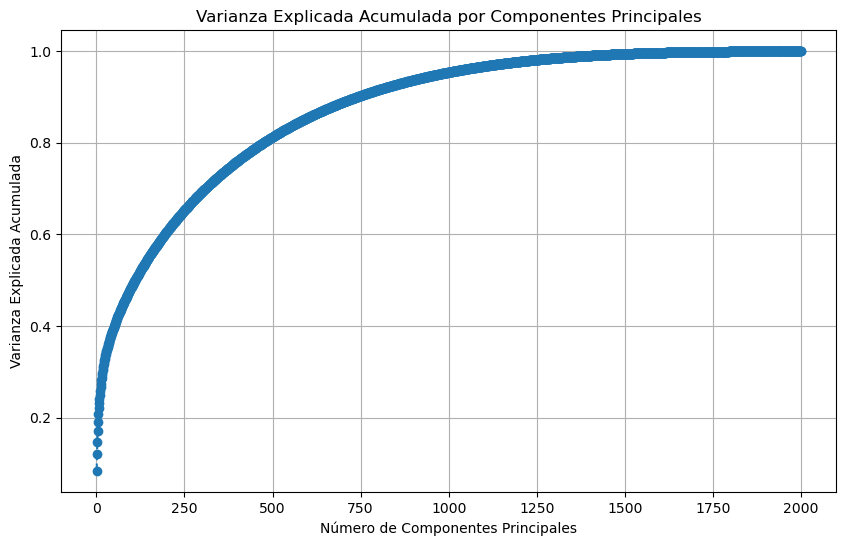

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

Vamos a quedarnos con 3000

In [92]:
pca = PCA(n_components=1000)
X_pca_1000 = pca.fit_transform(tfidf_importantes)
X_pca_1000

array([[-1.65786881e-02, -8.88606030e-02,  9.71042720e-02, ...,
        -5.60124103e-04, -2.53587989e-03,  2.63638983e-03],
       [-4.41040921e-02,  5.63374034e-02,  8.42546316e-02, ...,
         1.64087122e-03, -3.34860916e-03, -1.32837484e-03],
       [-4.94403682e-02,  2.29890073e-02, -1.86433791e-03, ...,
         2.19959952e-03,  2.37290891e-03,  4.44300114e-05],
       ...,
       [-3.74979488e-02,  4.62625632e-02,  2.37197184e-02, ...,
         6.27401206e-03, -5.30509506e-03, -1.14984980e-03],
       [-8.72369581e-02, -1.22449752e-02, -3.59669934e-02, ...,
         9.65832146e-04, -3.42979974e-03,  5.30759290e-03],
       [-6.56220510e-02,  1.21422351e-01,  2.70058115e-02, ...,
        -4.40112747e-03,  3.51065311e-04, -1.33225156e-03]])

In [93]:
df_pca_3000 = pd.DataFrame(X_pca_1000)

In [94]:
# Concatenar el DataFrame tfidf_df con df_libros
df_pca = pd.concat([df[["product_id", "average_rating"]].reset_index(drop=True), df_pca_3000], axis=1)

In [95]:
df_pca.head()

,product_id,average_rating,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
0,P107306,4.031621,-0.016579,-0.088861,0.097104,-0.015938,0.079168,-0.086045,0.057870,-0.000703,...,-0.002735,-0.000908,0.001917,-0.000731,-0.003047,0.007454,0.002057,-0.000560,-0.002536,0.002636
1,P114902,4.419882,-0.044104,0.056337,0.084255,-0.035797,-0.020471,-0.008385,-0.005788,0.026598,...,-0.001829,-0.000578,0.000531,0.001032,0.000260,-0.000859,0.000470,0.001641,-0.003349,-0.001328
2,P12045,4.443391,-0.049440,0.022989,-0.001864,-0.063749,-0.001199,-0.005128,-0.028536,-0.015021,...,0.004952,-0.000827,0.002652,-0.000559,-0.001277,-0.000258,-0.001797,0.002200,0.002373,0.000044
3,P122651,4.515000,-0.024552,0.121848,0.016137,0.010443,-0.020119,-0.042480,0.011082,-0.018787,...,0.001648,-0.001156,-0.001816,0.006376,0.004899,-0.002506,-0.002294,-0.003403,0.001655,0.002415
4,P122661,4.532099,-0.070892,0.103370,0.033960,-0.019182,0.000892,-0.029023,-0.011374,-0.001183,...,-0.002727,0.001011,-0.000034,0.004339,0.000642,0.001078,-0.002892,-0.004128,0.004021,-0.004272


In [96]:
product_data = pd.read_csv("data\df_limpio.csv")

In [98]:
product_data.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [97]:
product_data[["product_id", "brand_name", "rating", "reviews"]]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN
